# Hotel Booking Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
data = pd.read_csv(r"/Users/secretgarden/Desktop/Minor Hotels/Instructions/Hotel Booking.csv")
data.head()

,Hotelname,reservationno,ArrivalDate,DepartureDate,RoomNights,RoomRevenue,CurrencyCode,Channel,Guest Region,firstname,lastname,Guest Email
0,Cherry,14232570,8/8/2019 0:00,8/9/2019 0:00,1,5931.74,THB,Direct,China,NaN,Barnes,NaN
1,Cherry,14321242,8/9/2019 0:00,8/10/2019 0:00,1,5545.02,THB,Direct,China,NaN,Baker,NaN
2,Cherry,14308935,8/14/2019 0:00,8/15/2019 0:00,1,5545.02,THB,Direct,China,NaN,Parker,NaN
3,Cherry,13921904,9/30/2019 0:00,10/1/2019 0:00,1,8880.35,THB,Direct,China,NaN,Murray,NaN
4,Cherry,13921944,9/30/2019 0:00,10/1/2019 0:00,1,8880.35,THB,Direct,China,NaN,Hines,NaN


In [2]:
data.shape

(39039, 12)

<div class="alert alert-block alert-info">
We have 39039 rows and 12 columns.
</div>

## Data Cleaning on Hotel Booking Dataset

In [3]:
# Displaying column names
data.columns

Index(['Hotelname', 'reservationno', 'ArrivalDate', 'DepartureDate',
       'RoomNights', 'RoomRevenue', 'CurrencyCode', 'Channel', 'Guest Region',
       'firstname', 'lastname', 'Guest Email'],
      dtype='object')

In [4]:
# Standardizing the names of the columns to maintain a uniform structure
data.rename(columns={'Hotelname': 'hotel_name', 'reservationno':'reservation_no', 'ArrivalDate':'arrival_date',
                     'DepartureDate':'deperture_date', 'RoomNights':'room_nights', 
                     'RoomRevenue':'room_revenue','CurrencyCode':'currency_code', 
                     'Channel':'booking_channel', 'Guest Region':'guest_region', 
                     'firstname':'first_name', 'lastname':'last_name',
                     'Guest Email':'guest_email'}, inplace=True)

In [5]:
# New column names
data.columns

Index(['hotel_name', 'reservation_no', 'arrival_date', 'deperture_date',
       'room_nights', 'room_revenue', 'currency_code', 'booking_channel',
       'guest_region', 'first_name', 'last_name', 'guest_email'],
      dtype='object')

<div class="alert alert-block alert-info">
Now, the column names are consistent which make it easier to do analysis.
</div>

In [6]:
# Check duplicated rows
data.duplicated().sum()

0

<div class="alert alert-block alert-info">
There is no duplicate row.
</div>

In [7]:
# Check missing values
data.isnull().sum()

hotel_name            0
reservation_no        0
arrival_date          0
deperture_date        0
room_nights           0
room_revenue          0
currency_code         0
booking_channel       0
guest_region        168
first_name           31
last_name            98
guest_email        9678
dtype: int64

<div class="alert alert-block alert-info">
There are 168 missing regions, 31 missing first name, 98 missing last name and 9678 missing emails.
</div>

In [8]:
# Replace all missing values with "Unknown"
data['guest_region'].fillna("Unknown", inplace = True)
data['guest_email'].fillna("Unknown", inplace = True)
data['first_name'].fillna('Unknown', inplace=True)
data['last_name'].fillna('Unknown', inplace=True)

In [9]:
# Check missing values again
data.isnull().sum()

hotel_name         0
reservation_no     0
arrival_date       0
deperture_date     0
room_nights        0
room_revenue       0
currency_code      0
booking_channel    0
guest_region       0
first_name         0
last_name          0
guest_email        0
dtype: int64

In [10]:
# Check datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39039 entries, 0 to 39038
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hotel_name       39039 non-null  object 
 1   reservation_no   39039 non-null  int64  
 2   arrival_date     39039 non-null  object 
 3   deperture_date   39039 non-null  object 
 4   room_nights      39039 non-null  int64  
 5   room_revenue     39039 non-null  float64
 6   currency_code    39039 non-null  object 
 7   booking_channel  39039 non-null  object 
 8   guest_region     39039 non-null  object 
 9   first_name       39039 non-null  object 
 10  last_name        39039 non-null  object 
 11  guest_email      39039 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.6+ MB


In [11]:
# Convert 'arrival_date' and 'departure_date' to datetime objects
data['arrival_date'] = pd.to_datetime(data['arrival_date'])
data['deperture_date'] = pd.to_datetime(data['deperture_date'])

In [12]:
# Convert 'currency_code' to uppercase for consistency
data['currency_code'] = data['currency_code'].str.upper()

In [13]:
# Check datatype again, the datatype has changed for arrival and deperture date
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39039 entries, 0 to 39038
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   hotel_name       39039 non-null  object        
 1   reservation_no   39039 non-null  int64         
 2   arrival_date     39039 non-null  datetime64[ns]
 3   deperture_date   39039 non-null  datetime64[ns]
 4   room_nights      39039 non-null  int64         
 5   room_revenue     39039 non-null  float64       
 6   currency_code    39039 non-null  object        
 7   booking_channel  39039 non-null  object        
 8   guest_region     39039 non-null  object        
 9   first_name       39039 non-null  object        
 10  last_name        39039 non-null  object        
 11  guest_email      39039 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 3.6+ MB


In [14]:
# Display unique values of 'currency_code'
data['currency_code'].unique()

array(['THB', 'USD'], dtype=object)

<div class="alert alert-block alert-info">
Two Currency has been used to process the payment. USD and THB.
</div>

In [15]:
# Display unique values of 'hotel_name'
data['hotel_name'].unique()

array(['Cherry', 'Blueberry', 'Strawberry'], dtype=object)

<div class="alert alert-block alert-info">
There are three hotels naming Cherry, Blueberry and Strawberry.
</div>

In [16]:
# Display unique values of 'booking_channel'
data['booking_channel'].unique()

array(['Direct', 'Web', 'OTA'], dtype=object)

<div class="alert alert-block alert-info">
Three booking channel naming Direct, Web, OTA.
</div>

In [17]:
# Display unique values of 'guest_region'
data['guest_region'].unique()

array(['China', 'Unknown', 'Thailand', 'Asia', 'North America', 'Europe',
       'Middle East', 'Oceania', 'South America', 'Africa', 'Americas'],
      dtype=object)

<div class="alert alert-block alert-info">
We can see guest regions. Now, all the data in these columns seems fine now without any spelling errors.
</div>

In [18]:
data.head()

,hotel_name,reservation_no,arrival_date,deperture_date,room_nights,room_revenue,currency_code,booking_channel,guest_region,first_name,last_name,guest_email
0,Cherry,14232570,2019-08-08,2019-08-09,1,5931.74,THB,Direct,China,Unknown,Barnes,Unknown
1,Cherry,14321242,2019-08-09,2019-08-10,1,5545.02,THB,Direct,China,Unknown,Baker,Unknown
2,Cherry,14308935,2019-08-14,2019-08-15,1,5545.02,THB,Direct,China,Unknown,Parker,Unknown
3,Cherry,13921904,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,Unknown,Murray,Unknown
4,Cherry,13921944,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,Unknown,Hines,Unknown


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39039 entries, 0 to 39038
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   hotel_name       39039 non-null  object        
 1   reservation_no   39039 non-null  int64         
 2   arrival_date     39039 non-null  datetime64[ns]
 3   deperture_date   39039 non-null  datetime64[ns]
 4   room_nights      39039 non-null  int64         
 5   room_revenue     39039 non-null  float64       
 6   currency_code    39039 non-null  object        
 7   booking_channel  39039 non-null  object        
 8   guest_region     39039 non-null  object        
 9   first_name       39039 non-null  object        
 10  last_name        39039 non-null  object        
 11  guest_email      39039 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 3.6+ MB


In [29]:
data['hotel_name'].value_counts()

Cherry        16658
Blueberry     11246
Strawberry    11135
Name: hotel_name, dtype: int64

In [ ]:
# Export cleaned data
# data.to_csv('Hotel Booking Cleaned.csv', index=False)

## EDA on Dataset

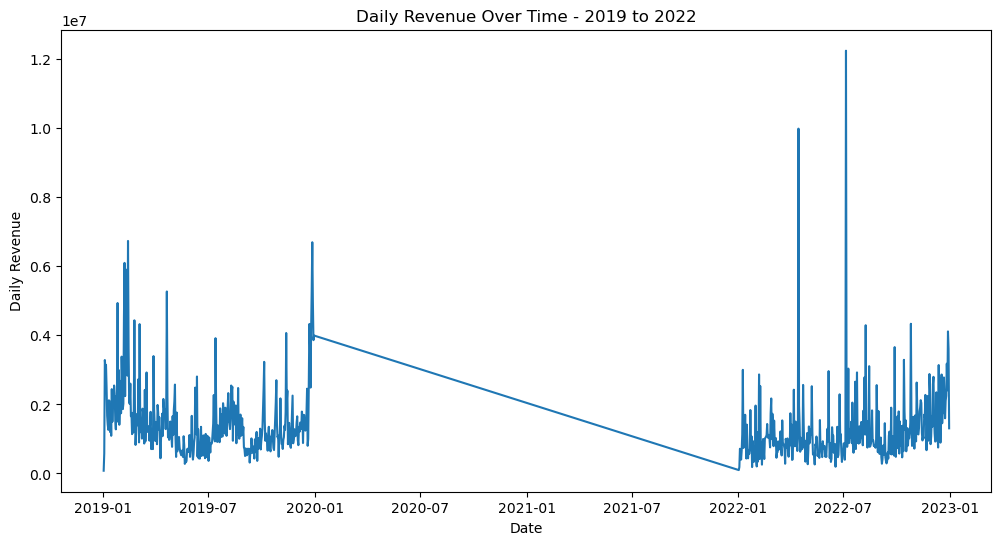

In [104]:
# Calculate daily revenue
daily_revenue = data.groupby(data['deperture_date'].dt.date)['room_revenue'].sum()

# Create a function to plot daily revenue
def plot_daily_revenue(data, title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=data.index, y=data.values)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Daily Revenue')
    plt.show()

# Plot for 2019 to 2022
plot_daily_revenue(daily_revenue, 'Daily Revenue Over Time - 2019 to 2022')

<div class="alert alert-block alert-info">
This dataset contains information for 2019 and 2022 only.
</div>

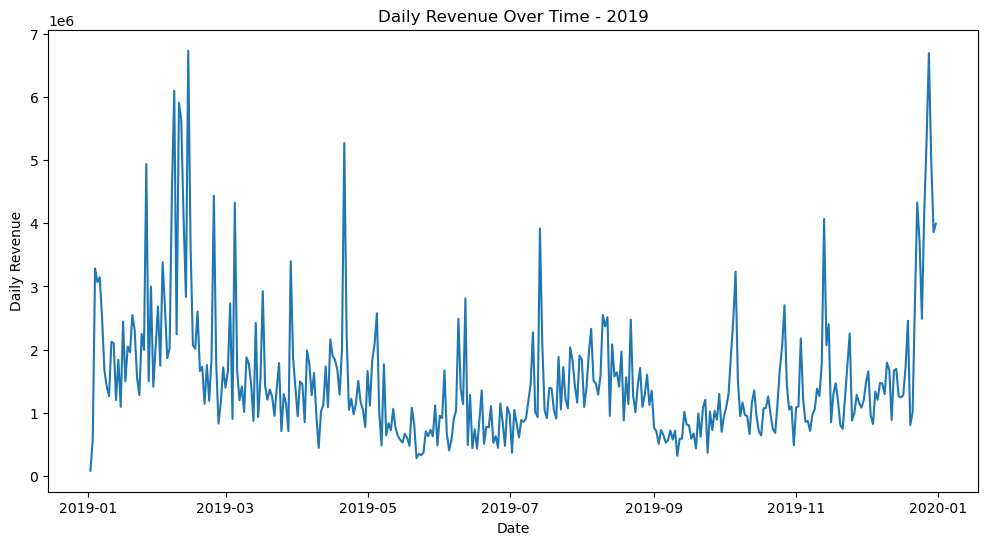

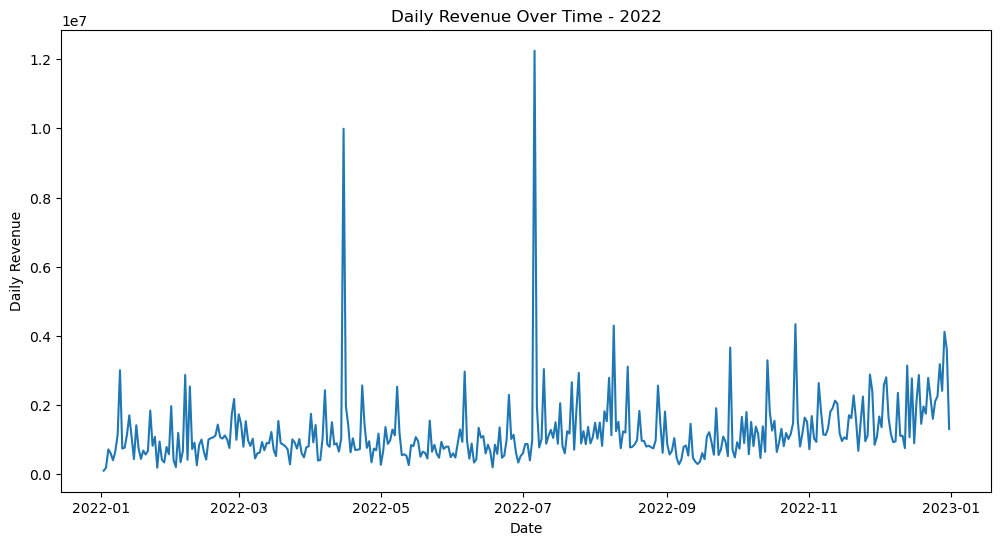

In [105]:
# Filter data for 2019 and 2022
data_2019 = data[data['deperture_date'].dt.year == 2019]
data_2022 = data[data['deperture_date'].dt.year == 2022]

# Calculate daily revenue
daily_revenue = data.groupby(data['deperture_date'].dt.date)['room_revenue'].sum()

# Create a function to plot daily revenue
def plot_daily_revenue(data, title):
    daily_revenue = data.groupby(data['deperture_date'].dt.date)['room_revenue'].sum()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=daily_revenue.index, y=daily_revenue.values)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Daily Revenue')
    plt.show()

# Plot for 2019
plot_daily_revenue(data_2019, 'Daily Revenue Over Time - 2019')

# Plot for 2022
plot_daily_revenue(data_2022, 'Daily Revenue Over Time - 2022')

# Uploading Exchange Rate Data

In [30]:
exchange_rate = pd.read_csv(r"/Users/secretgarden/Desktop/Minor Hotels/Data/exchange_rate.csv")
exchange_rate.head()

,Period,Buying Rate,Selling Rate
0,2019-01-02,32.1983,32.5345
1,2019-01-03,32.0442,32.3939
2,2019-01-04,31.9008,32.2298
3,2019-01-05,31.9008,32.2298
4,2019-01-06,31.9008,32.2298


In [31]:
exchange_rate.isnull().sum()

Period          0
Buying Rate     0
Selling Rate    0
dtype: int64

In [32]:
exchange_rate.shape

(1460, 3)

# Joining Two Tables on 'deperture_date' column and 'Period' column

In [33]:
# Convert 'Period' column in the exchange_rate DataFrame to datetime
exchange_rate['Period'] = pd.to_datetime(exchange_rate['Period'])

# Perform the merge on 'deperture_date' and 'Period'
# The how='left' parameter indicates that it's a left join, meaning that all rows from the data DataFrame 
# will be included in the merged DataFrame, and any matching rows from the exchange_rate DataFrame will be added.
# In this case, currency conversion date 'Period' is merged with 'deperture_date'
merged_data = pd.merge(data, exchange_rate, left_on='deperture_date', right_on='Period', how='left')

# Display the merged DataFrame
merged_data.head()

,hotel_name,reservation_no,arrival_date,deperture_date,room_nights,room_revenue,currency_code,booking_channel,guest_region,first_name,last_name,guest_email,Period,Buying Rate,Selling Rate
0,Cherry,14232570,2019-08-08,2019-08-09,1,5931.74,THB,Direct,China,Unknown,Barnes,Unknown,2019-08-09,30.5569,30.8932
1,Cherry,14321242,2019-08-09,2019-08-10,1,5545.02,THB,Direct,China,Unknown,Baker,Unknown,2019-08-10,30.5569,30.8932
2,Cherry,14308935,2019-08-14,2019-08-15,1,5545.02,THB,Direct,China,Unknown,Parker,Unknown,2019-08-15,30.6757,31.0225
3,Cherry,13921904,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,Unknown,Murray,Unknown,2019-10-01,30.4336,30.7753
4,Cherry,13921944,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,Unknown,Hines,Unknown,2019-10-01,30.4336,30.7753


In [34]:
merged_data.isnull().sum()

hotel_name         0
reservation_no     0
arrival_date       0
deperture_date     0
room_nights        0
room_revenue       0
currency_code      0
booking_channel    0
guest_region       0
first_name         0
last_name          0
guest_email        0
Period             0
Buying Rate        0
Selling Rate       0
dtype: int64

In [35]:
merged_data.duplicated().sum()

0

In [36]:
merged_data.shape

(39039, 15)

In [37]:
# Assuming your DataFrame is named 'merged_data'
merged_data['full_name'] = merged_data['first_name'] + ' ' + merged_data['last_name']

# Create a new column 'Revenue (USD)' and use np.where to apply conditions
merged_data['Revenue_USD'] = np.where(merged_data['currency_code'] == 'THB',
                                        merged_data['room_revenue'] / merged_data['Selling Rate'], 
                                        merged_data['room_revenue'])

merged_data['Revenue_USD'] = merged_data['Revenue_USD'].round(2)

# Display the updated DataFrame
merged_data

,hotel_name,reservation_no,arrival_date,deperture_date,room_nights,room_revenue,currency_code,booking_channel,guest_region,first_name,last_name,guest_email,Period,Buying Rate,Selling Rate,full_name,Revenue_USD
0,Cherry,14232570,2019-08-08,2019-08-09,1,5931.74,THB,Direct,China,Unknown,Barnes,Unknown,2019-08-09,30.5569,30.8932,Unknown Barnes,192.01
1,Cherry,14321242,2019-08-09,2019-08-10,1,5545.02,THB,Direct,China,Unknown,Baker,Unknown,2019-08-10,30.5569,30.8932,Unknown Baker,179.49
2,Cherry,14308935,2019-08-14,2019-08-15,1,5545.02,THB,Direct,China,Unknown,Parker,Unknown,2019-08-15,30.6757,31.0225,Unknown Parker,178.74
3,Cherry,13921904,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,Unknown,Murray,Unknown,2019-10-01,30.4336,30.7753,Unknown Murray,288.55
4,Cherry,13921944,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,Unknown,Hines,Unknown,2019-10-01,30.4336,30.7753,Unknown Hines,288.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39034,Strawberry,21494521,2022-10-01,2022-10-02,1,0.00,USD,Direct,Asia,Joseph,Yu,Unknown,2022-10-02,37.7454,38.0679,Joseph Yu,0.00
39035,Strawberry,21545467,2022-10-10,2022-10-11,1,0.00,USD,Direct,Asia,Joseph,Yu,Unknown,2022-10-11,37.9381,38.2615,Joseph Yu,0.00
39036,Strawberry,21716528,2022-11-07,2022-11-08,1,0.00,USD,Direct,Asia,Joseph,Yu,Unknown,2022-11-08,37.1709,37.4936,Joseph Yu,0.00
39037,Strawberry,18313636,2022-06-12,2022-06-19,7,6116.02,USD,Direct,Middle East,Adrian,Haley,ATerry@comcast.net,2022-06-19,35.0384,35.3562,Adrian Haley,6116.02


In [38]:
# Assuming your DataFrame is named 'merged_data'
merged_data['full_name'] = merged_data['first_name'] + ' ' + merged_data['last_name']

# Create a new column 'Revenue (THB)' and use np.where to apply conditions
merged_data['Revenue_THB'] = np.where(merged_data['currency_code'] == 'USD',
                                        merged_data['room_revenue'] * merged_data['Buying Rate'], 
                                        merged_data['room_revenue'])

merged_data['Revenue_THB'] = merged_data['Revenue_THB'].round(2)

# Display the updated DataFrame
merged_data

,hotel_name,reservation_no,arrival_date,deperture_date,room_nights,room_revenue,currency_code,booking_channel,guest_region,first_name,last_name,guest_email,Period,Buying Rate,Selling Rate,full_name,Revenue_USD,Revenue_THB
0,Cherry,14232570,2019-08-08,2019-08-09,1,5931.74,THB,Direct,China,Unknown,Barnes,Unknown,2019-08-09,30.5569,30.8932,Unknown Barnes,192.01,5931.74
1,Cherry,14321242,2019-08-09,2019-08-10,1,5545.02,THB,Direct,China,Unknown,Baker,Unknown,2019-08-10,30.5569,30.8932,Unknown Baker,179.49,5545.02
2,Cherry,14308935,2019-08-14,2019-08-15,1,5545.02,THB,Direct,China,Unknown,Parker,Unknown,2019-08-15,30.6757,31.0225,Unknown Parker,178.74,5545.02
3,Cherry,13921904,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,Unknown,Murray,Unknown,2019-10-01,30.4336,30.7753,Unknown Murray,288.55,8880.35
4,Cherry,13921944,2019-09-30,2019-10-01,1,8880.35,THB,Direct,China,Unknown,Hines,Unknown,2019-10-01,30.4336,30.7753,Unknown Hines,288.55,8880.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39034,Strawberry,21494521,2022-10-01,2022-10-02,1,0.00,USD,Direct,Asia,Joseph,Yu,Unknown,2022-10-02,37.7454,38.0679,Joseph Yu,0.00,0.00
39035,Strawberry,21545467,2022-10-10,2022-10-11,1,0.00,USD,Direct,Asia,Joseph,Yu,Unknown,2022-10-11,37.9381,38.2615,Joseph Yu,0.00,0.00
39036,Strawberry,21716528,2022-11-07,2022-11-08,1,0.00,USD,Direct,Asia,Joseph,Yu,Unknown,2022-11-08,37.1709,37.4936,Joseph Yu,0.00,0.00
39037,Strawberry,18313636,2022-06-12,2022-06-19,7,6116.02,USD,Direct,Middle East,Adrian,Haley,ATerry@comcast.net,2022-06-19,35.0384,35.3562,Adrian Haley,6116.02,214295.56


In [107]:
# merged_data.to_csv('Final.csv', index=False)

In [40]:
merged_data['currency_code'].unique()

array(['THB', 'USD'], dtype=object)

In [41]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39039 entries, 0 to 39038
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   hotel_name       39039 non-null  object        
 1   reservation_no   39039 non-null  int64         
 2   arrival_date     39039 non-null  datetime64[ns]
 3   deperture_date   39039 non-null  datetime64[ns]
 4   room_nights      39039 non-null  int64         
 5   room_revenue     39039 non-null  float64       
 6   currency_code    39039 non-null  object        
 7   booking_channel  39039 non-null  object        
 8   guest_region     39039 non-null  object        
 9   first_name       39039 non-null  object        
 10  last_name        39039 non-null  object        
 11  guest_email      39039 non-null  object        
 12  Period           39039 non-null  datetime64[ns]
 13  Buying Rate      39039 non-null  float64       
 14  Selling Rate     39039 non-null  float

In [42]:
rows_with_zero_revenue = merged_data[merged_data['room_revenue'] == 0]

# Display the resulting DataFrame
rows_with_zero_revenue

,hotel_name,reservation_no,arrival_date,deperture_date,room_nights,room_revenue,currency_code,booking_channel,guest_region,first_name,last_name,guest_email,Period,Buying Rate,Selling Rate,full_name,Revenue_USD,Revenue_THB
6,Cherry,18472487,2022-06-26,2022-06-27,1,0.0,THB,Direct,Thailand,Unknown,Rangel,Unknown,2022-06-27,35.2528,35.5839,Unknown Rangel,0.0,0.0
8,Cherry,21507180,2022-10-03,2022-10-04,1,0.0,THB,Direct,Thailand,Unknown,Murphy,Unknown,2022-10-04,37.6018,37.9276,Unknown Murphy,0.0,0.0
9,Cherry,21507916,2022-10-03,2022-10-04,1,0.0,THB,Direct,Thailand,Unknown,Moore,Unknown,2022-10-04,37.6018,37.9276,Unknown Moore,0.0,0.0
10,Cherry,21515050,2022-10-04,2022-10-05,1,0.0,THB,Direct,Thailand,Unknown,PhD,Unknown,2022-10-05,37.2390,37.5592,Unknown PhD,0.0,0.0
11,Cherry,21507179,2022-10-03,2022-10-04,1,0.0,THB,Direct,Thailand,Unknown,Smith,Unknown,2022-10-04,37.6018,37.9276,Unknown Smith,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39024,Strawberry,13686186,2019-04-23,2019-04-25,2,0.0,USD,OTA,Europe,Selena,Santiago,SelenaGomez@protonmail.com,2019-04-25,31.8827,32.2320,Selena Santiago,0.0,0.0
39025,Strawberry,14716940,2019-10-23,2019-10-26,3,0.0,USD,Web,Europe,Selena,Santiago,SelenaGomez@protonmail.com,2019-10-26,30.0635,30.4052,Selena Santiago,0.0,0.0
39034,Strawberry,21494521,2022-10-01,2022-10-02,1,0.0,USD,Direct,Asia,Joseph,Yu,Unknown,2022-10-02,37.7454,38.0679,Joseph Yu,0.0,0.0
39035,Strawberry,21545467,2022-10-10,2022-10-11,1,0.0,USD,Direct,Asia,Joseph,Yu,Unknown,2022-10-11,37.9381,38.2615,Joseph Yu,0.0,0.0


In [43]:
merged_data.shape

(39039, 18)

In [44]:
merged_data['Revenue_THB'].sum()

3176385957.6000004

<div class="alert alert-block alert-info">
Total revenue in THB is 3.17 Billion.
</div>

In [45]:
merged_data['Revenue_USD'].sum()

96821431.95

<div class="alert alert-block alert-info">
Total revenue in USD is 96.8 Millions.
</div>

In [48]:
sum_room_nights_cherry = merged_data.loc[merged_data['hotel_name'] == 'Cherry', 'room_nights'].sum()
sum_room_nights_cherry

42067

In [49]:
merged_data['reservation_no']

0        14232570
1        14321242
2        14308935
3        13921904
4        13921944
           ...   
39034    21494521
39035    21545467
39036    21716528
39037    18313636
39038    13304131
Name: reservation_no, Length: 39039, dtype: int64

In [108]:
# find missing profile
merged_data.loc[(merged_data['first_name'] == 'Unknown') |
                (merged_data['last_name'] == 'Unknown') |
                (merged_data['guest_region'] == 'Unknown'), 'full_name'].sum()

'Unknown BarnesUnknown BakerUnknown ParkerUnknown MurrayUnknown HinesUnknown FletcherUnknown RangelUnknown VelezUnknown MurphyUnknown MooreUnknown PhDUnknown SmithUnknown ThomasUnknown FriedmanUnknown TorresUnknown ZavalaUnknown MartinUnknown LeeUnknown RodriguezUnknown SchmidtUnknown MatthewsUnknown ChungUnknown GarciaUnknown TaylorUnknown SanchezVirginia UnknownVirginia UnknownVirginia UnknownVirginia UnknownVictoria UnknownMary MendezDerrick UnknownDerrick UnknownSheena HumphreyJennifer BartonCharles TaylorJulie UnknownMatthew LangKatherine OlsonMark GarciaJim UnknownJim UnknownJim UnknownHarold UnknownHarold UnknownHarold UnknownHarold UnknownHarold UnknownKaren HarrisHeather HartValerie UnknownValerie UnknownRobert ChungErin UnderwoodSteven MurphyRachel FriedmanKimberly UnknownMichael MooreJohn MatthewsMichael UnknownJessica UnknownEmily PenningtonAaron MillerThomas UnknownMonica GibbsKatherine OlsonJo CabreraSandy McdanielStephen BrownBrent HamiltonPatrick CurryValerie RichardsKr

In [109]:
# Filter rows where 'full_name' contains 'Unknown'
unknown_names_count = merged_data['full_name'].str.contains('Unknown').sum()

# Display the result
print(f'Missing first/last name count: {unknown_names_count}')

Missing first/last name count: 123


<div class="alert alert-block alert-info">
Missing first/last name count: 123
</div>

In [55]:
# Filter rows where 'full_name' contains 'Unknown'
unknown_email_count = merged_data['guest_email'].str.contains('Unknown').sum()
print(f'Missing email count: {unknown_email_count}')

Missing email count: 9678


<div class="alert alert-block alert-info">
Missing email count: 9678
</div>

In [56]:
unknown_region_count = merged_data['guest_region'].str.contains('Unknown').sum()
print(f'Missing region count: {unknown_region_count}')

Missing region count: 168


<div class="alert alert-block alert-info">
Missing region count: 168
</div>

In [57]:
# Count the total number of unique profiles based on unique emails
unique_email_count = data['guest_email'].nunique()

# Display the result
print(f'Total profile count based on unique emails: {unique_email_count}')

Total profile count based on unique emails: 24706


<div class="alert alert-block alert-info">
Total profile count based on unique emails: 24706
</div>

In [70]:
# Check for duplicated emails
# The keep=False parameter ensures that all occurrences of a duplicated email are marked as True.
# data[data.duplicated('guest_email', keep=False)]: This filters the DataFrame to include only the rows with duplicated emails.
duplicated_emails = data[data.duplicated('guest_email', keep=False)]

# Display the profiles with duplicated emails
print(f'Duplicated emails: {duplicated_emails["guest_email"].count()}')

Duplicated emails: 17560


<div class="alert alert-block alert-info">
Duplicated emails: 17560
</div>

In [96]:
# Select rows with negative revenue
negative_revenue_rows = merged_data[merged_data['room_revenue'] < 0]

# Display the selected rows
negative_revenue_rows

,hotel_name,reservation_no,arrival_date,deperture_date,room_nights,room_revenue,currency_code,booking_channel,guest_region,first_name,last_name,guest_email,Period,Buying Rate,Selling Rate,full_name,Revenue_USD,Revenue_THB
237,Cherry,16560889,2022-01-04,2022-01-07,3,-530.3400,THB,Direct,Thailand,Jenna,Harrington,Castillo.Jenna@yahoo.com,2022-01-07,33.4151,33.7446,Jenna Harrington,-15.72,-530.34
609,Cherry,21860682,2022-11-30,2022-11-30,0,-13900.5800,THB,Direct,North America,Nancy,Mccormick,Stanley_Craig@verizon.com,2022-11-30,35.2097,35.5352,Nancy Mccormick,-391.18,-13900.58
875,Cherry,13485146,2019-04-18,2019-04-20,2,-73.4400,THB,Direct,Thailand,Amy,Green,Amy_C24@verizon.com,2019-04-20,31.6361,31.9834,Amy Green,-2.30,-73.44
1075,Cherry,16560888,2022-01-04,2022-01-07,3,-530.3400,THB,Direct,Thailand,Katie,MD,Unknown,2022-01-07,33.4151,33.7446,Katie MD,-15.72,-530.34
1164,Cherry,13485579,2019-08-23,2019-08-25,2,-1432.1800,THB,Web,Thailand,Angela,Williams,Angela_Hogan@att.com,2019-08-25,30.6109,30.9462,Angela Williams,-46.28,-1432.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27113,Blueberry,21657082,2022-11-11,2022-11-15,4,-22700.0000,THB,Direct,Asia,Debbie,Jones,Perez_Debbie57@xfinity.com,2022-11-15,35.5282,35.8595,Debbie Jones,-633.03,-22700.00
29302,Strawberry,21176579,2022-08-23,2022-09-06,14,-4108.0007,USD,Direct,Europe,Angela,Williams,Tracy_Perez@xfinity.com,2022-09-06,36.2775,36.6024,Angela Williams,-4108.00,-149028.00
30175,Strawberry,17234475,2022-03-03,2022-03-03,0,-265.5823,USD,Direct,Europe,Heather,Hart,Unknown,2022-03-03,32.3568,32.6850,Heather Hart,-265.58,-8593.39
32361,Strawberry,14665510,2019-10-31,2019-11-02,2,-274.2800,USD,Direct,Europe,Debra,Fuller,DebraWilliams@verizon.com,2019-11-02,29.9899,30.3406,Debra Fuller,-274.28,-8225.63


In [99]:
negative_revenue_rows['Revenue_THB'].sum()

-437930.08

In [100]:
negative_revenue_rows['Revenue_USD'].sum()

-12624.48